In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Cleaning

In [2]:
#Read csv from pandas
df = pd.read_csv('diabetic_data.csv')

In [3]:
#checkign contents of data
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# checking data
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
#checking data type
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
#checking columns
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
#removing duplicates and checking
print("Number of Rows Before Removing Duplicates: ",df.shape[0])
df.drop_duplicates(inplace=True)
print("Number of Rows After Removing Duplicates: ",df.shape[0])

Number of Rows Before Removing Duplicates:  101766
Number of Rows After Removing Duplicates:  101766


##### No duplicates found

In [8]:
# Lets check the statistic description of the dataset
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
# Lets replace the ? mark and also check for total null data
df.replace('?',np.nan,inplace=True)
df.isnull().sum()/df.shape[0]

encounter_id                0.000000
patient_nbr                 0.000000
race                        0.022336
gender                      0.000000
age                         0.000000
weight                      0.968585
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
payer_code                  0.395574
medical_specialty           0.490822
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.000206
diag_2                      0.003518
diag_3                      0.013983
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
c

__Target variable is readmitted__<br>
__So lets look at what factors might affect it and remove the uneccesary ones__

In [10]:
#No "id" columns are useful to us. And hence let drop all of them
for i in df.columns:
    if "_id" in i:
        print("Dropping",i)
        del df[i]
#We don't need patient number too
del df['patient_nbr']
del df['weight']
del df['medical_specialty']

Dropping encounter_id
Dropping admission_type_id
Dropping discharge_disposition_id
Dropping admission_source_id


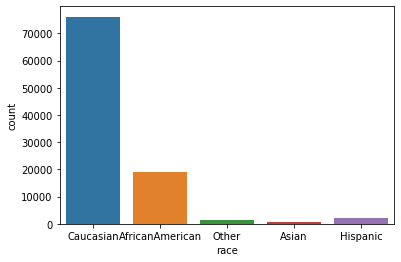

In [11]:
#visualizing this
sns.countplot(df['race'])

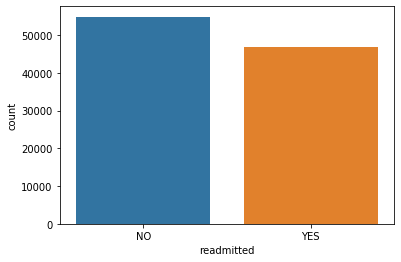

In [12]:
#visualising readmitted 
df['readmitted'] = df['readmitted'].replace({'<30':'YES','>30':'YES'})
sns.countplot(df['readmitted'])

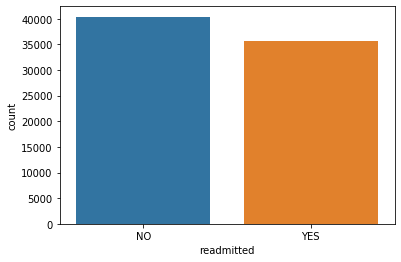

In [13]:
#visualizing race of readmitted
sns.countplot(df[df.race=='Caucasian']['readmitted'])

In [14]:
#Race doesn't play any role in deciding risk.
del df["race"]

In [15]:
#Payer code doesn't play any code
del df['payer_code']

In [16]:
#converting to numeric....
df.diag_1=pd.to_numeric(df['diag_1'],errors='coerce')
df.diag_2=pd.to_numeric(df['diag_2'],errors='coerce')
df.diag_3=pd.to_numeric(df['diag_3'],errors='coerce')

In [17]:
#df.fillna(method='bfill',inplace=True)
df.dropna(inplace=True)
#Dropping resulted in 1% increase in accuracy

In [18]:
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Female,[10-20),3,59,0,18,0,0,0,276.0,...,No,Up,No,No,No,No,No,Ch,Yes,YES
3,Male,[30-40),2,44,1,16,0,0,0,8.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Male,[40-50),1,51,0,8,0,0,0,197.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Male,[50-60),3,31,6,16,0,0,0,414.0,...,No,Steady,No,No,No,No,No,No,Yes,YES
7,Male,[70-80),5,73,0,12,0,0,0,428.0,...,No,No,No,No,No,No,No,No,Yes,YES


In [19]:
# now how are we doing w.r.t data types
df.dtypes

gender                       object
age                          object
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                 object
rosiglitazone                object
acarbose                     object
miglitol                    

In [20]:
#check for null data
df.isnull().sum()

gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-

In [21]:
#dont need examide
df.examide.unique()
del df['examide']

In [22]:
#dont need citoglipton
df.citoglipton.unique()
del df['citoglipton']

In [23]:
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Female,[10-20),3,59,0,18,0,0,0,276.0,...,No,Up,No,No,No,No,No,Ch,Yes,YES
3,Male,[30-40),2,44,1,16,0,0,0,8.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Male,[40-50),1,51,0,8,0,0,0,197.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Male,[50-60),3,31,6,16,0,0,0,414.0,...,No,Steady,No,No,No,No,No,No,Yes,YES
7,Male,[70-80),5,73,0,12,0,0,0,428.0,...,No,No,No,No,No,No,No,No,Yes,YES


In [24]:
#Simple Function to calcuate comorbidity
def calculate_Comorbidity(a,b,c):
    diabetes=0
    circulatory=0
    if (int(a)==250 or int(b)==250 or int(c)==250):
        diabetes=1
    if (a>390 and a<459)or(b>390 and b<459)or(c>390 and c<459):
        circulatory=2
    return diabetes+circulatory

In [25]:
temp=df[['diag_1','diag_2','diag_3']]

In [26]:
com=[]
for i in range(temp.shape[0]):
    com.append(calculate_Comorbidity(temp.diag_1.iloc[i],temp.diag_2.iloc[i],temp.diag_3.iloc[i]))

In [27]:
df['Comorbidity']=com

In [28]:
df.Comorbidity.unique()

array([1, 3, 2, 0])

In [29]:
df['readmitted'] = df['readmitted'].replace({'YES':1,'NO':0})

# Step 2: EDA

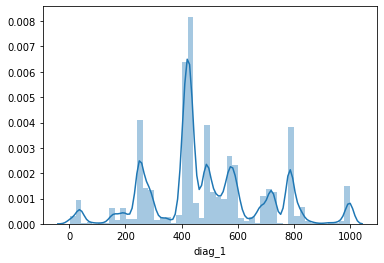

In [30]:
sns.distplot(df['diag_1'])

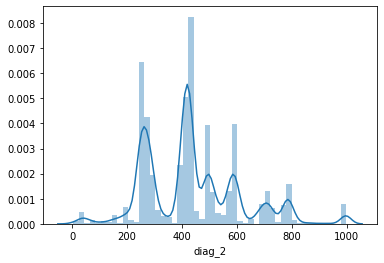

In [31]:
sns.distplot(df['diag_2'])

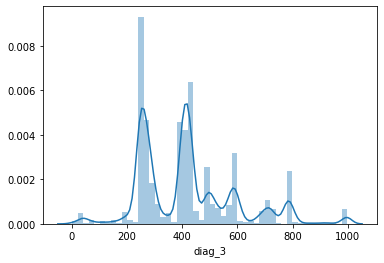

In [32]:
sns.distplot(df['diag_3'])

We can observe that all the diagnosis are distributed in a similar way

In [33]:
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Comorbidity
1,Female,[10-20),3,59,0,18,0,0,0,276.0,...,Up,No,No,No,No,No,Ch,Yes,1,1
3,Male,[30-40),2,44,1,16,0,0,0,8.0,...,Up,No,No,No,No,No,Ch,Yes,0,3
4,Male,[40-50),1,51,0,8,0,0,0,197.0,...,Steady,No,No,No,No,No,Ch,Yes,0,1
5,Male,[50-60),3,31,6,16,0,0,0,414.0,...,Steady,No,No,No,No,No,No,Yes,1,3
7,Male,[70-80),5,73,0,12,0,0,0,428.0,...,No,No,No,No,No,No,No,Yes,1,3


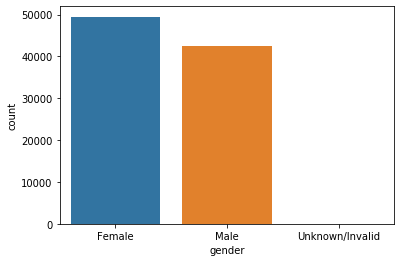

In [34]:
sns.countplot(df['gender'])

Notice Female more count than Male

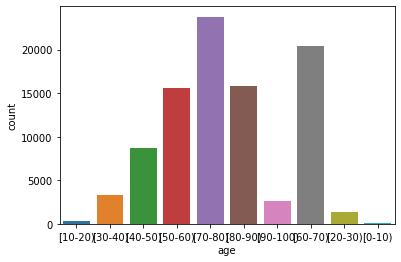

In [35]:
sns.countplot(df['age'])

Notice 60-70-80 are more, also could pose high risk

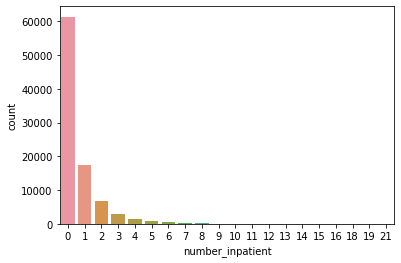

In [36]:
#inpatients
sns.countplot(df['number_inpatient'])

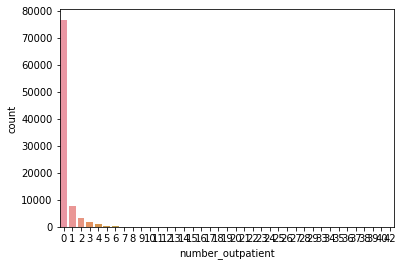

In [37]:
#outpatients
sns.countplot(df['number_outpatient'])

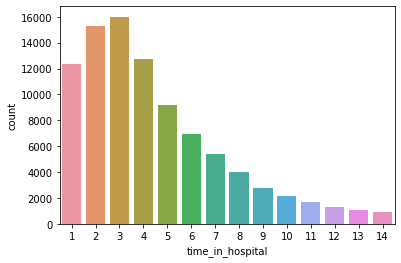

In [38]:
#timespent in hospital on
sns.countplot(df['time_in_hospital'])

In [39]:
#Scale Numerical Features
from sklearn.preprocessing import MinMaxScaler
df['diag_1']=MinMaxScaler().fit_transform(df['diag_1'].to_numpy().reshape(-1,1))
df['diag_2']=MinMaxScaler().fit_transform(df['diag_2'].to_numpy().reshape(-1,1))
df['diag_3']=MinMaxScaler().fit_transform(df['diag_3'].to_numpy().reshape(-1,1))

#Encoding Categorical Features
data_to_encode=df.select_dtypes(include=['object'])
from category_encoders import TargetEncoder
for col in data_to_encode.columns:
    df[col]=TargetEncoder().fit_transform(X=df[col],y=df['readmitted'])

In [40]:
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Comorbidity
1,0.471127,0.417989,3,59,0,18,0,0,0,0.274096,...,0.515379,0.463162,0.46325,0.463258,0.463274,0.463269,0.487901,0.480285,1,1
3,0.454103,0.432201,2,44,1,16,0,0,0,0.005020,...,0.515379,0.463162,0.46325,0.463258,0.463274,0.463269,0.487901,0.480285,0,3
4,0.454103,0.450265,1,51,0,8,0,0,0,0.194779,...,0.454064,0.463162,0.46325,0.463258,0.463274,0.463269,0.487901,0.480285,0,1
5,0.454103,0.441751,3,31,6,16,0,0,0,0.412651,...,0.454064,0.463162,0.46325,0.463258,0.463274,0.463269,0.442020,0.480285,1,3
7,0.454103,0.483971,5,73,0,12,0,0,0,0.426707,...,0.439203,0.463162,0.46325,0.463258,0.463274,0.463269,0.442020,0.480285,1,3


In [41]:
# checking corr
df.corr()['readmitted']

gender                      0.017524
age                         0.043935
time_in_hospital            0.049100
num_lab_procedures          0.037744
num_procedures             -0.046612
num_medications             0.042470
number_outpatient           0.081906
number_emergency            0.101046
number_inpatient            0.215677
diag_1                     -0.014646
diag_2                      0.002422
diag_3                      0.024033
number_diagnoses            0.108447
max_glu_serum               0.022013
A1Cresult                   0.023332
metformin                   0.026888
repaglinide                 0.021962
nateglinide                 0.003706
chlorpropamide              0.006414
glimepiride                 0.007343
acetohexamide               0.003552
glipizide                   0.018951
glyburide                   0.003831
tolbutamide                 0.003940
pioglitazone                0.012117
rosiglitazone               0.018369
acarbose                    0.014169
m

Looks like there is no significant correlation

## Step 3 Model Building

In [42]:
#import library and create train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(['readmitted'],axis=1),df['readmitted'],test_size=0.30,random_state=10)

In [43]:
xtrain.shape

(64290, 39)

In [44]:
ytrain.shape

(64290,)

In [45]:
xtest.shape

(27554, 39)

In [46]:
ytest.shape

(27554,)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier().fit(xtrain,ytrain)
predicted=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(predicted,ytest)

0.6333381723161792

In [48]:
#features versus readmitted
features=pd.DataFrame()
features['feature']=df.drop(['readmitted'],axis=1).columns
features['importance']=model.feature_importances_

In [49]:
features.sort_values(by=['importance'],ascending=False,inplace=True)

In [50]:
#features
features

,feature,importance
8,number_inpatient,0.519453
12,number_diagnoses,0.069688
7,number_emergency,0.056313
6,number_outpatient,0.052154
9,diag_1,0.048832
1,age,0.044526
5,num_medications,0.028941
11,diag_3,0.026195
37,diabetesMed,0.025498
10,diag_2,0.022884


In [51]:
#columns list
cols=list(features.iloc[0:15].feature)

In [52]:
#creating a dataframe with features we want
readmitted=df['readmitted']
df=df[cols]
df['readmitted']=readmitted

In [53]:
#checking
df.head()

,number_inpatient,number_diagnoses,number_emergency,number_outpatient,diag_1,age,num_medications,diag_3,diabetesMed,diag_2,time_in_hospital,num_lab_procedures,num_procedures,Comorbidity,max_glu_serum,readmitted
1,0,9,0,0,0.274096,0.417989,18,0.253012,0.480285,0.246489,3,59,0,1,0.461826,1
3,0,7,0,0,0.005020,0.432201,16,0.401606,0.480285,0.246911,2,44,1,3,0.461826,0
4,0,5,0,0,0.194779,0.450265,8,0.247992,0.480285,0.152918,1,51,0,1,0.461826,0
5,0,9,0,0,0.412651,0.441751,16,0.247992,0.480285,0.408451,3,31,6,3,0.461826,1
7,0,8,0,0,0.426707,0.483971,12,0.247992,0.480285,0.489940,5,73,0,3,0.461826,1


In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(['readmitted'],axis=1),df['readmitted'])

### Method 1 Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier().fit(xtrain,ytrain)
predicted=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(predicted,ytest)

0.6293715430512609

Getting 62% accuracy

In [56]:
# Lets check 
from sklearn.metrics import classification_report
print(classification_report(predicted,ytest))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69     14873
           1       0.48      0.63      0.54      8088

    accuracy                           0.63     22961
   macro avg       0.62      0.63      0.62     22961
weighted avg       0.66      0.63      0.64     22961



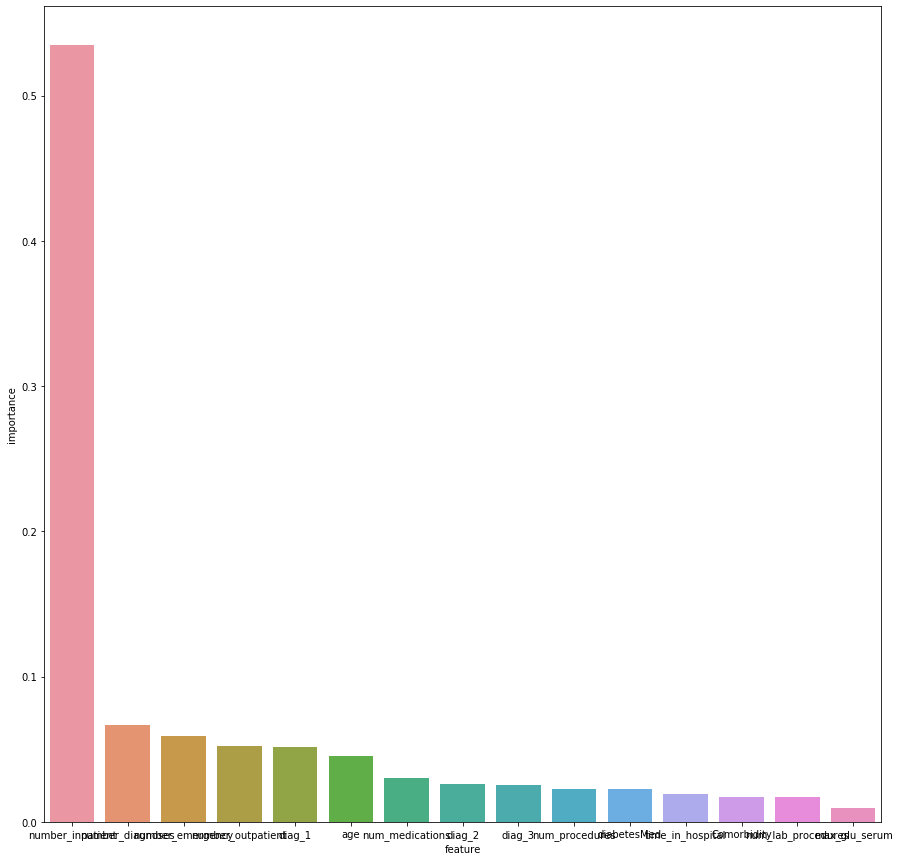

In [57]:
# now exploring high risk medium and low risk
features=pd.DataFrame()
features['feature']=df.drop(['readmitted'],axis=1).columns
features['importance']=model.feature_importances_
features.sort_values(by=['importance'],ascending=False,inplace=True)
plt.figure(figsize=[15,15])
sns.barplot(features['feature'],features['importance'])

### Method 2 Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(xtrain,ytrain)
predicted=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(predicted,ytest)

/home/paree/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.615739732590044

Getting 61% accuracy

In [59]:
from sklearn.metrics import classification_report
print(classification_report(predicted,ytest))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70     16564
           1       0.39      0.64      0.48      6397

    accuracy                           0.62     22961
   macro avg       0.60      0.62      0.59     22961
weighted avg       0.69      0.62      0.64     22961

